## [Q2. 4 marks] 
In a square box of size 100x100, place 20 points randomly. Connect each point to the 
nearest three and thus discretize the square into elements. Display the points and their connections 
using a plot. Save the locations of the points in a text file (assn2b.txt) in the increasing order of their
distance from the origin

We Import 2 function
1. dict from math to find distace between two points
2. cmp_to_key to get the so that we can pass a compare just like it is possible in C++ and Python2

To make a list of random points we use randint. We make a list 2 randint and treat them as a cordinate and repeat this process 20

In [1]:
from math import dist
from functools import cmp_to_key
random_points = [[randint(1, 100),randint(1,100)] for i in range(20)]; 

Now we need a way to find closest points to a given point.
For this we find the distance of a single point from all the points (including itself). And we make a list and sort the list from distance and add the first four item of the list to other list. As the distance of the point from itself will be 0. The four elements persent in this list are closest point and the point itself.

Now we have the list. We clean the list by removing the the distance present in the list. 

In [2]:
def closest_pts(random_points):
    pts = []
    for p in random_points:
        distance_from_a_single_pt = []
        for q in random_points:
            
            d = dist(p,q)
            dum=[]
            dum.append(d)
            dum.append(q)
            distance_from_a_single_pt.append(dum)
            
        distance_from_a_single_pt.sort()
        pts.append(distance_from_a_single_pt[:4])
        distance_from_a_single_pt.clear
    fpts=[]
    for elment in pts:
        dum=[]
        for i in elment:
            dum.append(i[1])
        fpts.append(dum)
    return fpts

In [3]:
pairs = closest_pts(random_points)

We get a empty plot by making the origin

In [4]:
final_plot = plot([0,0])

Now we use a for loop to join all the points one graph and then append it over and over

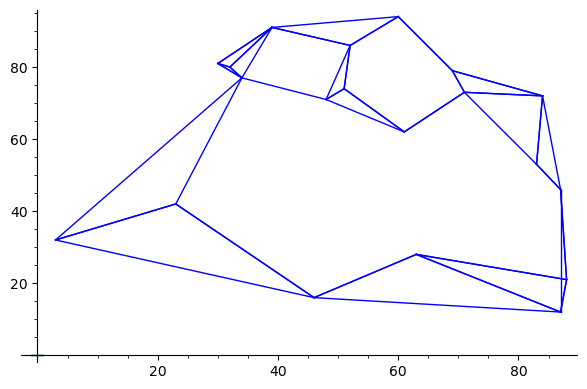

In [5]:
for item in pairs:
    p1= line([item[0],item[1]])
    p2= line([item[0],item[2]])
    p3= line([item[0],item[3]])
    final_plot = final_plot + p1 + p2 + p3
final_plot.show()

We first define fuction to compare the distance from the origin. Now if the distance of the first point is less than that of the second point then we return -1. Any negative return value puts the first input ahead of the second input in the sort funtion when the compare function is called. And vice versa for positive return.

In [6]:
def compare(a,b):
    if dist(a,(0,0)) < dist(b,(0,0)) :
        return -1
    else:
        return 1

ascending_point= sorted(random_points,key=cmp_to_key(compare))


Now write the list to a text file

In [7]:
with open("assn2b.txt", "w") as f:
    for s in ascending_point:
        f.write(str(s) +"\n")